discounted_price        3.010231e+03
actual_price            5.256683e+03
discount_percentage              NaN
rating                  4.097790e+00
rating_count            1.833051e+04
revenue                5.566729e+299
dtype: float64


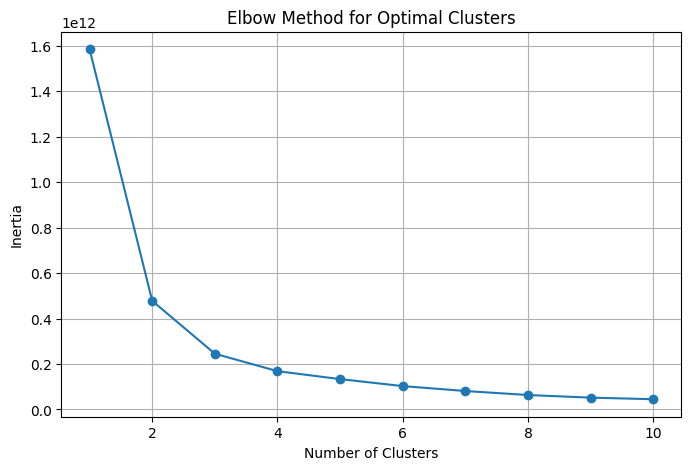

                        user_id  total_spent  avg_spent  purchase_count  \
0  AE22E2AXODSPNK3EBIHNGYS5LOSA       1999.0     1999.0               1   
1  AE22MK2NXQD3ZARLIOL3SLD4GU6A       3599.0     3599.0               1   
2  AE22Y3KIS7SE6LI3HE2VS6WWPU4Q        239.0      239.0               1   
3  AE23RS3W7GZO7LHYKJU6KSKVM4MQ       1999.0     1999.0               1   
4  AE23WGYTUMB5R6JJMBU4V43JIW7Q       1187.0     1187.0               1   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
          total_spent     avg_spent  purchase_count
cluster                                            
0         1796.108699   1605.432296        1.225032
1        98984.406593  33696.693223        3.802198
2        34606.596552  21955.137069        1.855172


In [44]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
file_path = r"C:\Users\AKASH KRITHIK\Desktop\Amazon Sales Data Analysis\cleaned_amazon_data.csv"
df = pd.read_csv(file_path)

# Clean and convert necessary columns
df["discounted_price"] = df["discounted_price"].astype(str).str.replace(",", "").astype(float)
df["actual_price"] = df["actual_price"].astype(str).str.replace(",", "").astype(float)
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors='coerce')
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
df["rating_count"] = pd.to_numeric(df["rating_count"], errors='coerce')
df["revenue"] = pd.to_numeric(df["revenue"], errors='coerce')

# Check basic statistics (optional)
# print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'revenue']].mean())

# Grouping customers based on spending behavior
customer_data = df.groupby("user_id").agg(
    total_spent=("discounted_price", "sum"),   # Total amount spent
    avg_spent=("discounted_price", "mean"),    # Average spend per order
    purchase_count=("user_id", "count")        # Number of purchases
).reset_index()

# Prepare features for clustering
df_numeric = customer_data[['total_spent', 'avg_spent', 'purchase_count']]
df_numeric = df_numeric.fillna(df_numeric.mean())

# Elbow method to find optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()

# Apply KMeans with optimal k (you can choose based on the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data["cluster"] = kmeans.fit_predict(df_numeric)

# Display the first few clustered rows
# print(customer_data.head())

# Analyze cluster characteristics (numeric columns only)
cluster_analysis = customer_data.groupby("cluster")[["total_spent", "avg_spent", "purchase_count"]].mean()
print(cluster_analysis)
